# Graphviz

In [17]:
import numpy as np 
from tensor import Tensor
from mlp import MLP, Neuron, Layer 
from loss import Loss
from activations import *
from optimizer import Optimizer

In [5]:
from graphviz import Digraph


def trace(root):
    nodes, edges = set(), set()

    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v.children:
                edges.add((child, v))
                build(child)

    build(root)
    return nodes, edges


def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir})  # , node_attr={'rankdir': 'TB'})

    for n in nodes:
        dot.node(name=str(id(n)), label="{ %s | data %.4f | grad %.4f }" % (n.label, n.value, n.grad), shape='record')
        if n.operator:
            dot.node(name=str(id(n)) + n.operator, label=n.operator)
            dot.edge(str(id(n)) + n.operator, str(id(n)))

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2.operator)

    return dot

# Testbench

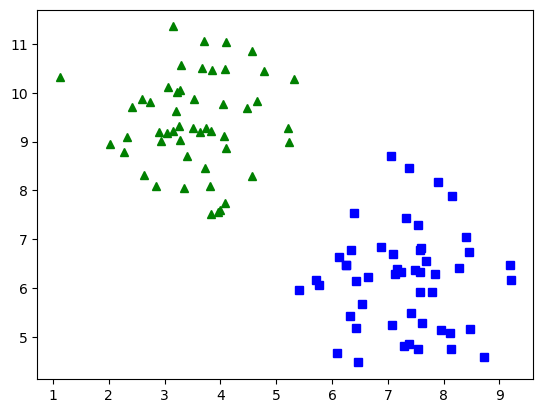

In [6]:
import matplotlib.pyplot as plt
# plt.rcParams['figure.dpi'] = 200
from sklearn import datasets

# Taken from https://stackoverflow.com/questions/47961536/how-to-generate-linear-separable-dataset-by-using-sklearn-datasets-make-classifi
X, Y = datasets.make_blobs(n_samples=100, centers=2, n_features=2, center_box=(0, 10), random_state=42)
plt.plot(X[:, 0][Y == 0], X[:, 1][Y == 0], 'g^')
plt.plot(X[:, 0][Y == 1], X[:, 1][Y == 1], 'bs')
plt.show()

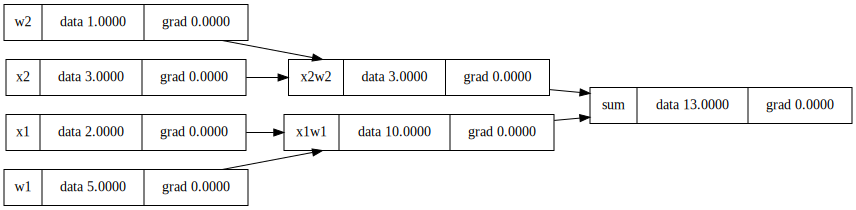

In [5]:
x1 = Tensor(2, label='x1') 
x2 = Tensor(3, label='x2') 
w1 = Tensor(5, label='w1') 
w2 = Tensor(1, label='w2') 
x1w1 = x1 * w1 ; x1w1.label='x1w1'
x2w2 = x2 * w2 ; x2w2.label='x2w2'
sum = x1w1 + x2w2 ; sum.label='sum'
#out = F.sigmoid(sum); out.label='out'
out = sum
draw_dot(out)

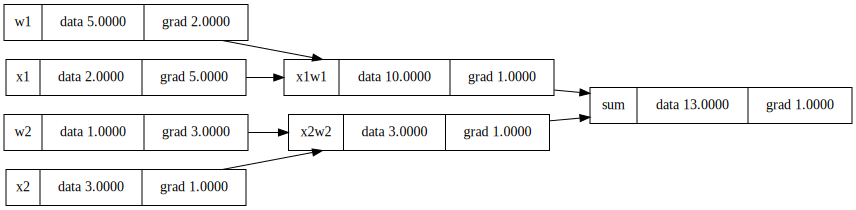

In [9]:
out.backward() 
draw_dot(out)

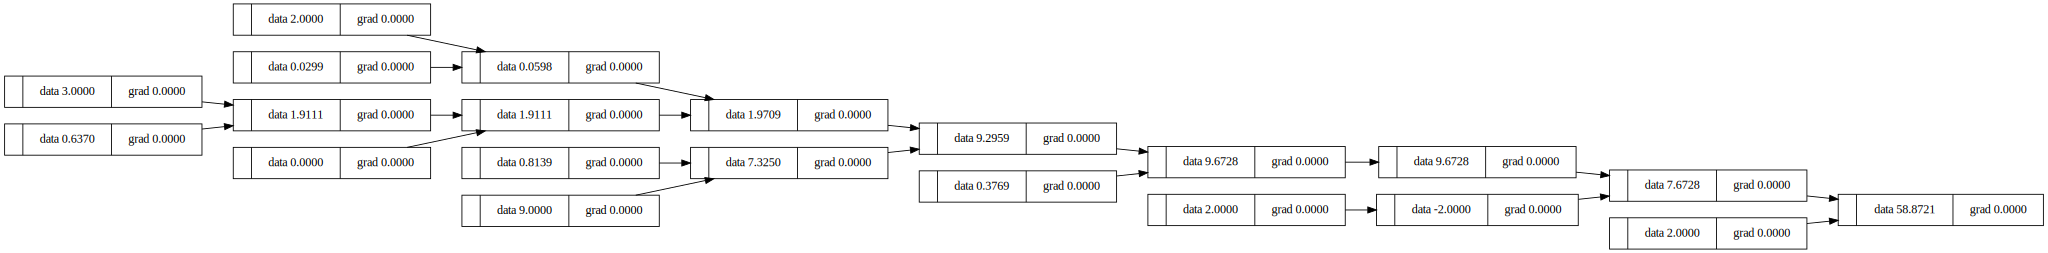

In [22]:
n = Neuron(3, F.relu)
out = Loss.MSE(n([3, 2, 9]), 2)
draw_dot(out)


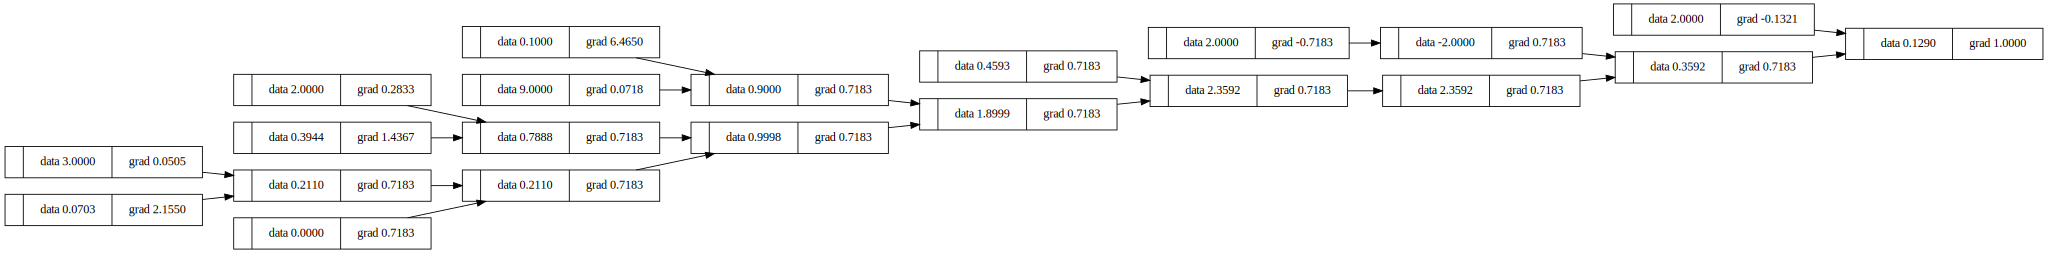

In [10]:
out.backward() 
draw_dot(out)

In [19]:
def train(X, Y, model:MLP, optimizer:Optimizer, epochs=100): 

    loss = Tensor(0)
    for i in range(epochs):
        yhats = []
        loss = Tensor(0)
        for x, y in zip(X, Y):
            yhat = model(x)
            yhats.append(yhat.value)
            loss += Loss.MSE(y, yhat)

        loss /= X.shape[0]

        # Print accuracy
        print(f'Epoch No.{i} -> Loss = {loss.value}')
        optimizer.zero_grad(loss)
        loss.backward()
        optimizer.step()

In [14]:
train_data = (X - np.mean(X, axis=0))/np.var(X, axis=0)
labels = Y

input_size = len(train_data[0])
layer_sizes = [4, 1]
activations = [F.relu, F.relu]
model = MLP(input_size, layer_sizes, activations)
optimizer = Optimizer(model, 0.1)
train(train_data, labels, model, optimizer, epochs=1000)

Epoch No.0 -> Loss = 14.872854689155346
Epoch No.1 -> Loss = 13.558626035063979
Epoch No.2 -> Loss = 12.580991242927764
Epoch No.3 -> Loss = 11.84563530754313
Epoch No.4 -> Loss = 11.03776944910524
Epoch No.5 -> Loss = 10.936099647605529
Epoch No.6 -> Loss = 9.935193061344751
Epoch No.7 -> Loss = 9.853631162636615
Epoch No.8 -> Loss = 8.986808495070786
Epoch No.9 -> Loss = 8.48286972280441
Epoch No.10 -> Loss = 7.97024943196246
Epoch No.11 -> Loss = 7.442399995723482
Epoch No.12 -> Loss = 7.398286522964208
Epoch No.13 -> Loss = 6.922998324340156
Epoch No.14 -> Loss = 6.556294402114643
Epoch No.15 -> Loss = 6.256247042019029
Epoch No.16 -> Loss = 5.976989083594672
Epoch No.17 -> Loss = 5.660002194933871
Epoch No.18 -> Loss = 5.628466784547153
Epoch No.19 -> Loss = 5.339026412637672
Epoch No.20 -> Loss = 5.0676695168607155
Epoch No.21 -> Loss = 4.727820327650158
Epoch No.22 -> Loss = 4.705065138865129
Epoch No.23 -> Loss = 4.685385061161143
Epoch No.24 -> Loss = 4.425548367212488
Epoch N

KeyboardInterrupt: 

In [34]:
Y

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])